In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importing the MNIST dataset

In [91]:
data=pd.read_csv('train.csv')

In [92]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
data.shape

(42000, 785)

In [94]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

# Parameter Initialization

In [95]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

# Implementation Of Forward Propagation And Backward Propagation

In [96]:
# ReLU Activation Function
def ReLU(Z):
    return np.maximum(Z,0)


# Softmax Activation Function
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)
    return A


# Forward Propagation
def forward_prop(W1,b1,W2,b2,X):
    Z1=np.dot(W1,X)+b1
    A1=ReLU(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2


# ReLU Derivative for Backpropagation
def ReLU_deriv(Z):
    return Z>0


# One-Hot Encoding for Labels
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y



# Backward Propagation
def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=X.shape[1]
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=1/m *np.dot(dZ2,A1.T)
    db2=1/m *np.sum(dZ2)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1=1/m *np.dot(dZ1,X.T)
    db1=1/m *np.sum(dZ1)
    return dW1,db1,dW2,db2
    

# Parameter Update Using Gradient Descent

In [97]:
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

# Model Training

In [103]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y)*100)
    return W1, b1, W2, b2

In [104]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 2 9 ... 9 6 2] [4 9 0 ... 9 5 4]
9.28048780487805
Iteration:  10
[3 3 8 ... 9 8 8] [4 9 0 ... 9 5 4]
19.51707317073171
Iteration:  20
[3 9 8 ... 9 8 8] [4 9 0 ... 9 5 4]
26.978048780487807
Iteration:  30
[5 9 0 ... 9 8 8] [4 9 0 ... 9 5 4]
33.63414634146341
Iteration:  40
[5 9 0 ... 9 8 8] [4 9 0 ... 9 5 4]
40.60243902439025
Iteration:  50
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
47.00731707317073
Iteration:  60
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
52.38292682926829
Iteration:  70
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
56.80731707317073
Iteration:  80
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
60.380487804878044
Iteration:  90
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
63.21219512195122
Iteration:  100
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
65.66829268292683
Iteration:  110
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
67.60731707317073
Iteration:  120
[5 9 0 ... 9 4 4] [4 9 0 ... 9 5 4]
69.18536585365854
Iteration:  130
[5 9 0 ... 9 8 4] [4 9 0 ... 9 5 4]
70.62682926829268
Iteration:  140
[5 9 0 ... 9 8

In [105]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Predictions

Prediction:  [4]
Label:  4


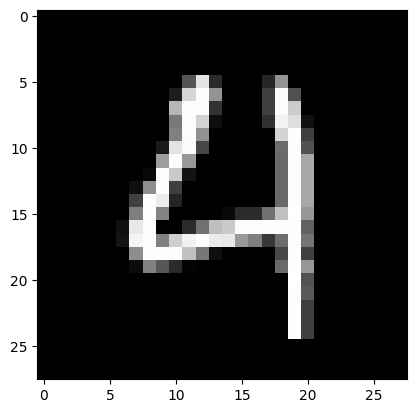

Prediction:  [9]
Label:  9


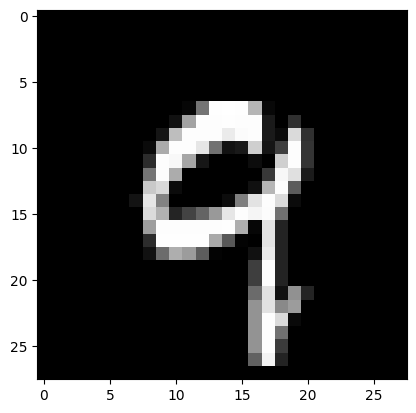

Prediction:  [0]
Label:  0


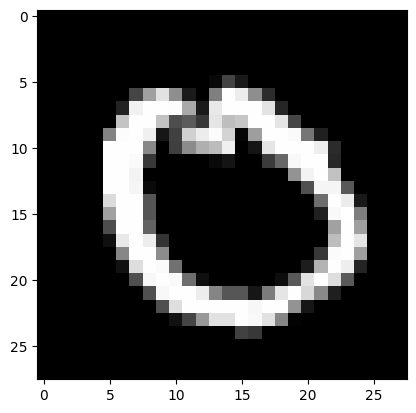

Prediction:  [1]
Label:  1


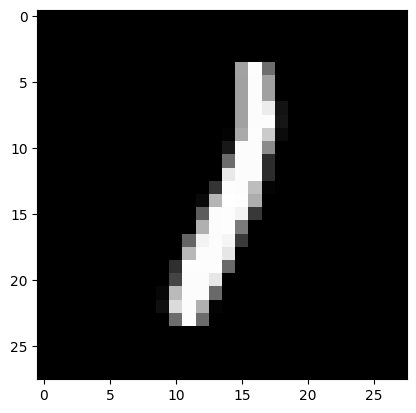

In [106]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [107]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("{}%".format(get_accuracy(dev_predictions, Y_dev) * 100))

[6 0 8 6 3 0 9 8 1 6 2 1 1 0 6 6 5 9 7 6 5 9 7 4 8 7 1 4 1 8 2 7 9 3 8 1 0
 7 0 7 2 6 9 7 9 9 5 9 1 7 1 4 5 7 7 4 3 9 5 4 2 7 1 1 1 8 3 1 9 4 2 9 9 7
 7 8 7 7 9 8 8 9 5 5 2 6 4 9 4 2 3 3 0 3 2 3 8 8 8 0 8 3 5 6 3 0 7 1 6 1 4
 3 0 1 0 4 3 5 6 7 8 9 7 2 3 3 7 2 7 9 8 1 4 1 4 9 9 6 1 8 3 8 3 7 3 4 0 7
 1 2 1 9 9 5 5 9 9 4 0 8 7 2 5 4 2 0 1 1 3 4 2 6 8 7 9 0 3 1 9 8 7 4 9 6 7
 2 8 8 7 0 1 6 6 5 1 1 6 6 0 4 9 7 1 9 7 6 7 7 1 7 3 6 3 7 0 4 4 9 2 1 3 3
 2 7 7 5 4 6 9 5 2 8 7 7 4 6 2 9 3 5 8 4 2 3 9 4 2 7 7 3 5 3 2 0 0 5 0 1 6
 1 1 3 7 7 8 2 8 3 4 7 2 9 5 6 9 7 6 3 4 5 3 3 5 4 1 8 1 2 4 2 2 8 6 4 7 2
 7 1 6 6 2 4 1 5 1 2 2 9 4 9 5 5 3 5 0 2 7 4 3 6 6 4 4 3 9 9 1 7 7 9 9 7 2
 2 2 1 4 8 4 4 1 0 4 5 6 7 1 4 2 5 4 4 1 0 5 3 0 7 7 1 3 6 3 6 3 9 8 8 8 8
 0 3 0 8 9 0 7 1 2 0 8 0 1 0 6 7 9 2 9 4 6 6 8 8 7 0 4 9 0 8 3 9 5 2 4 7 2
 3 4 6 4 1 0 0 0 3 9 9 1 5 9 5 8 5 0 4 2 7 1 0 1 4 3 7 3 2 2 5 1 7 3 6 7 5
 8 3 3 1 9 7 3 3 6 3 8 7 5 9 7 0 7 3 9 9 3 9 7 5 8 3 8 1 9 2 5 3 5 3 8 0 9
 4 9 0 4 5 8 3 9 8 9 7 2 

# Accuracy

Still 85.1% accuracy, so our model generalized from the training data pretty well.